# SVM Classifier

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.shape # Checking the shape of data.

(299, 13)

In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
data.nunique() # Finding the unique data for analysis.

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
data.info() # Identifying type of each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().sum() # Checking for missing values. 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.describe().style.background_gradient(axis=0) # Describing the dataset.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


## Exploratory Data Analysis (EDA)

<AxesSubplot:>

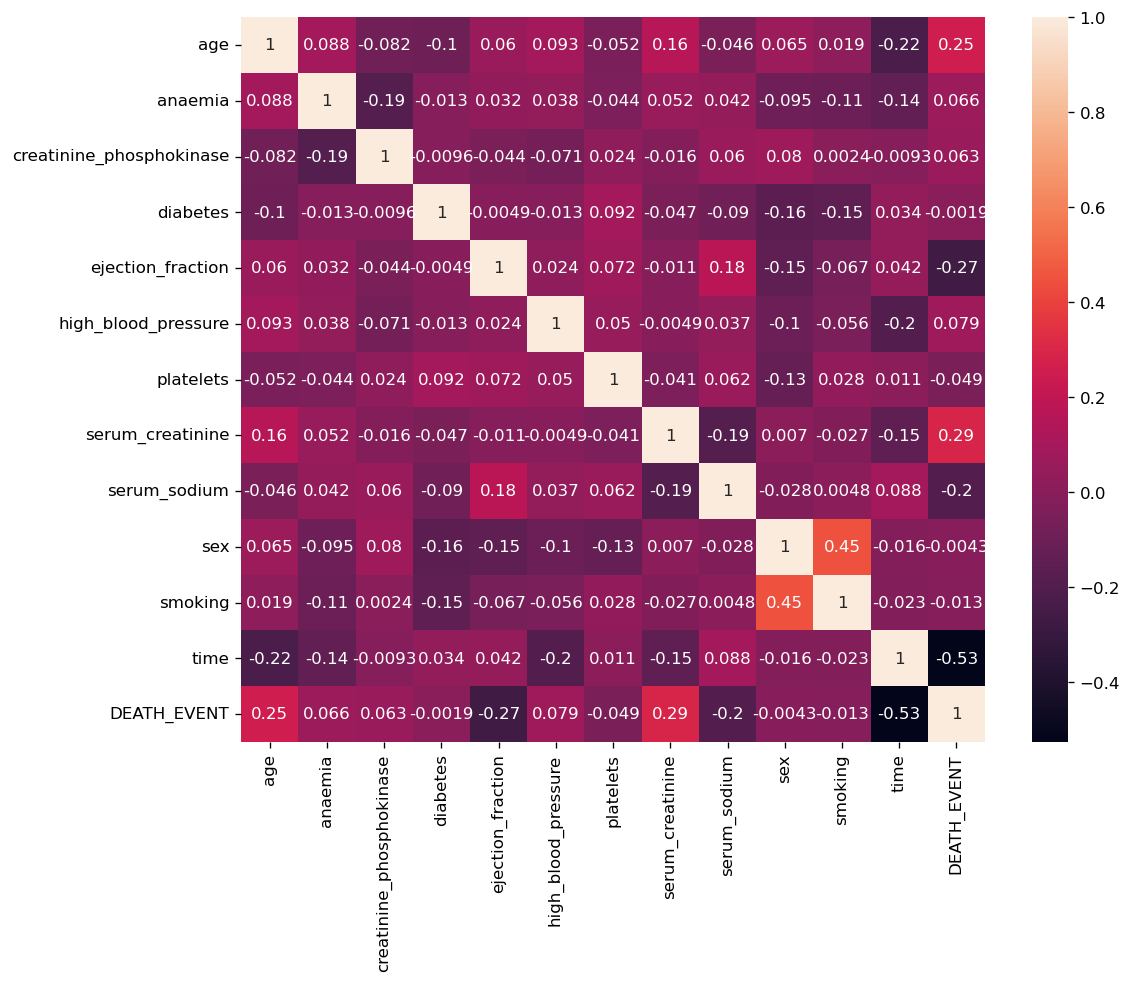

In [9]:
plt.figure(figsize=(10,8),dpi=120)
sns.heatmap(data.corr(),annot=True) # Finding the correlationship between each data.

<Figure size 3600x3000 with 0 Axes>

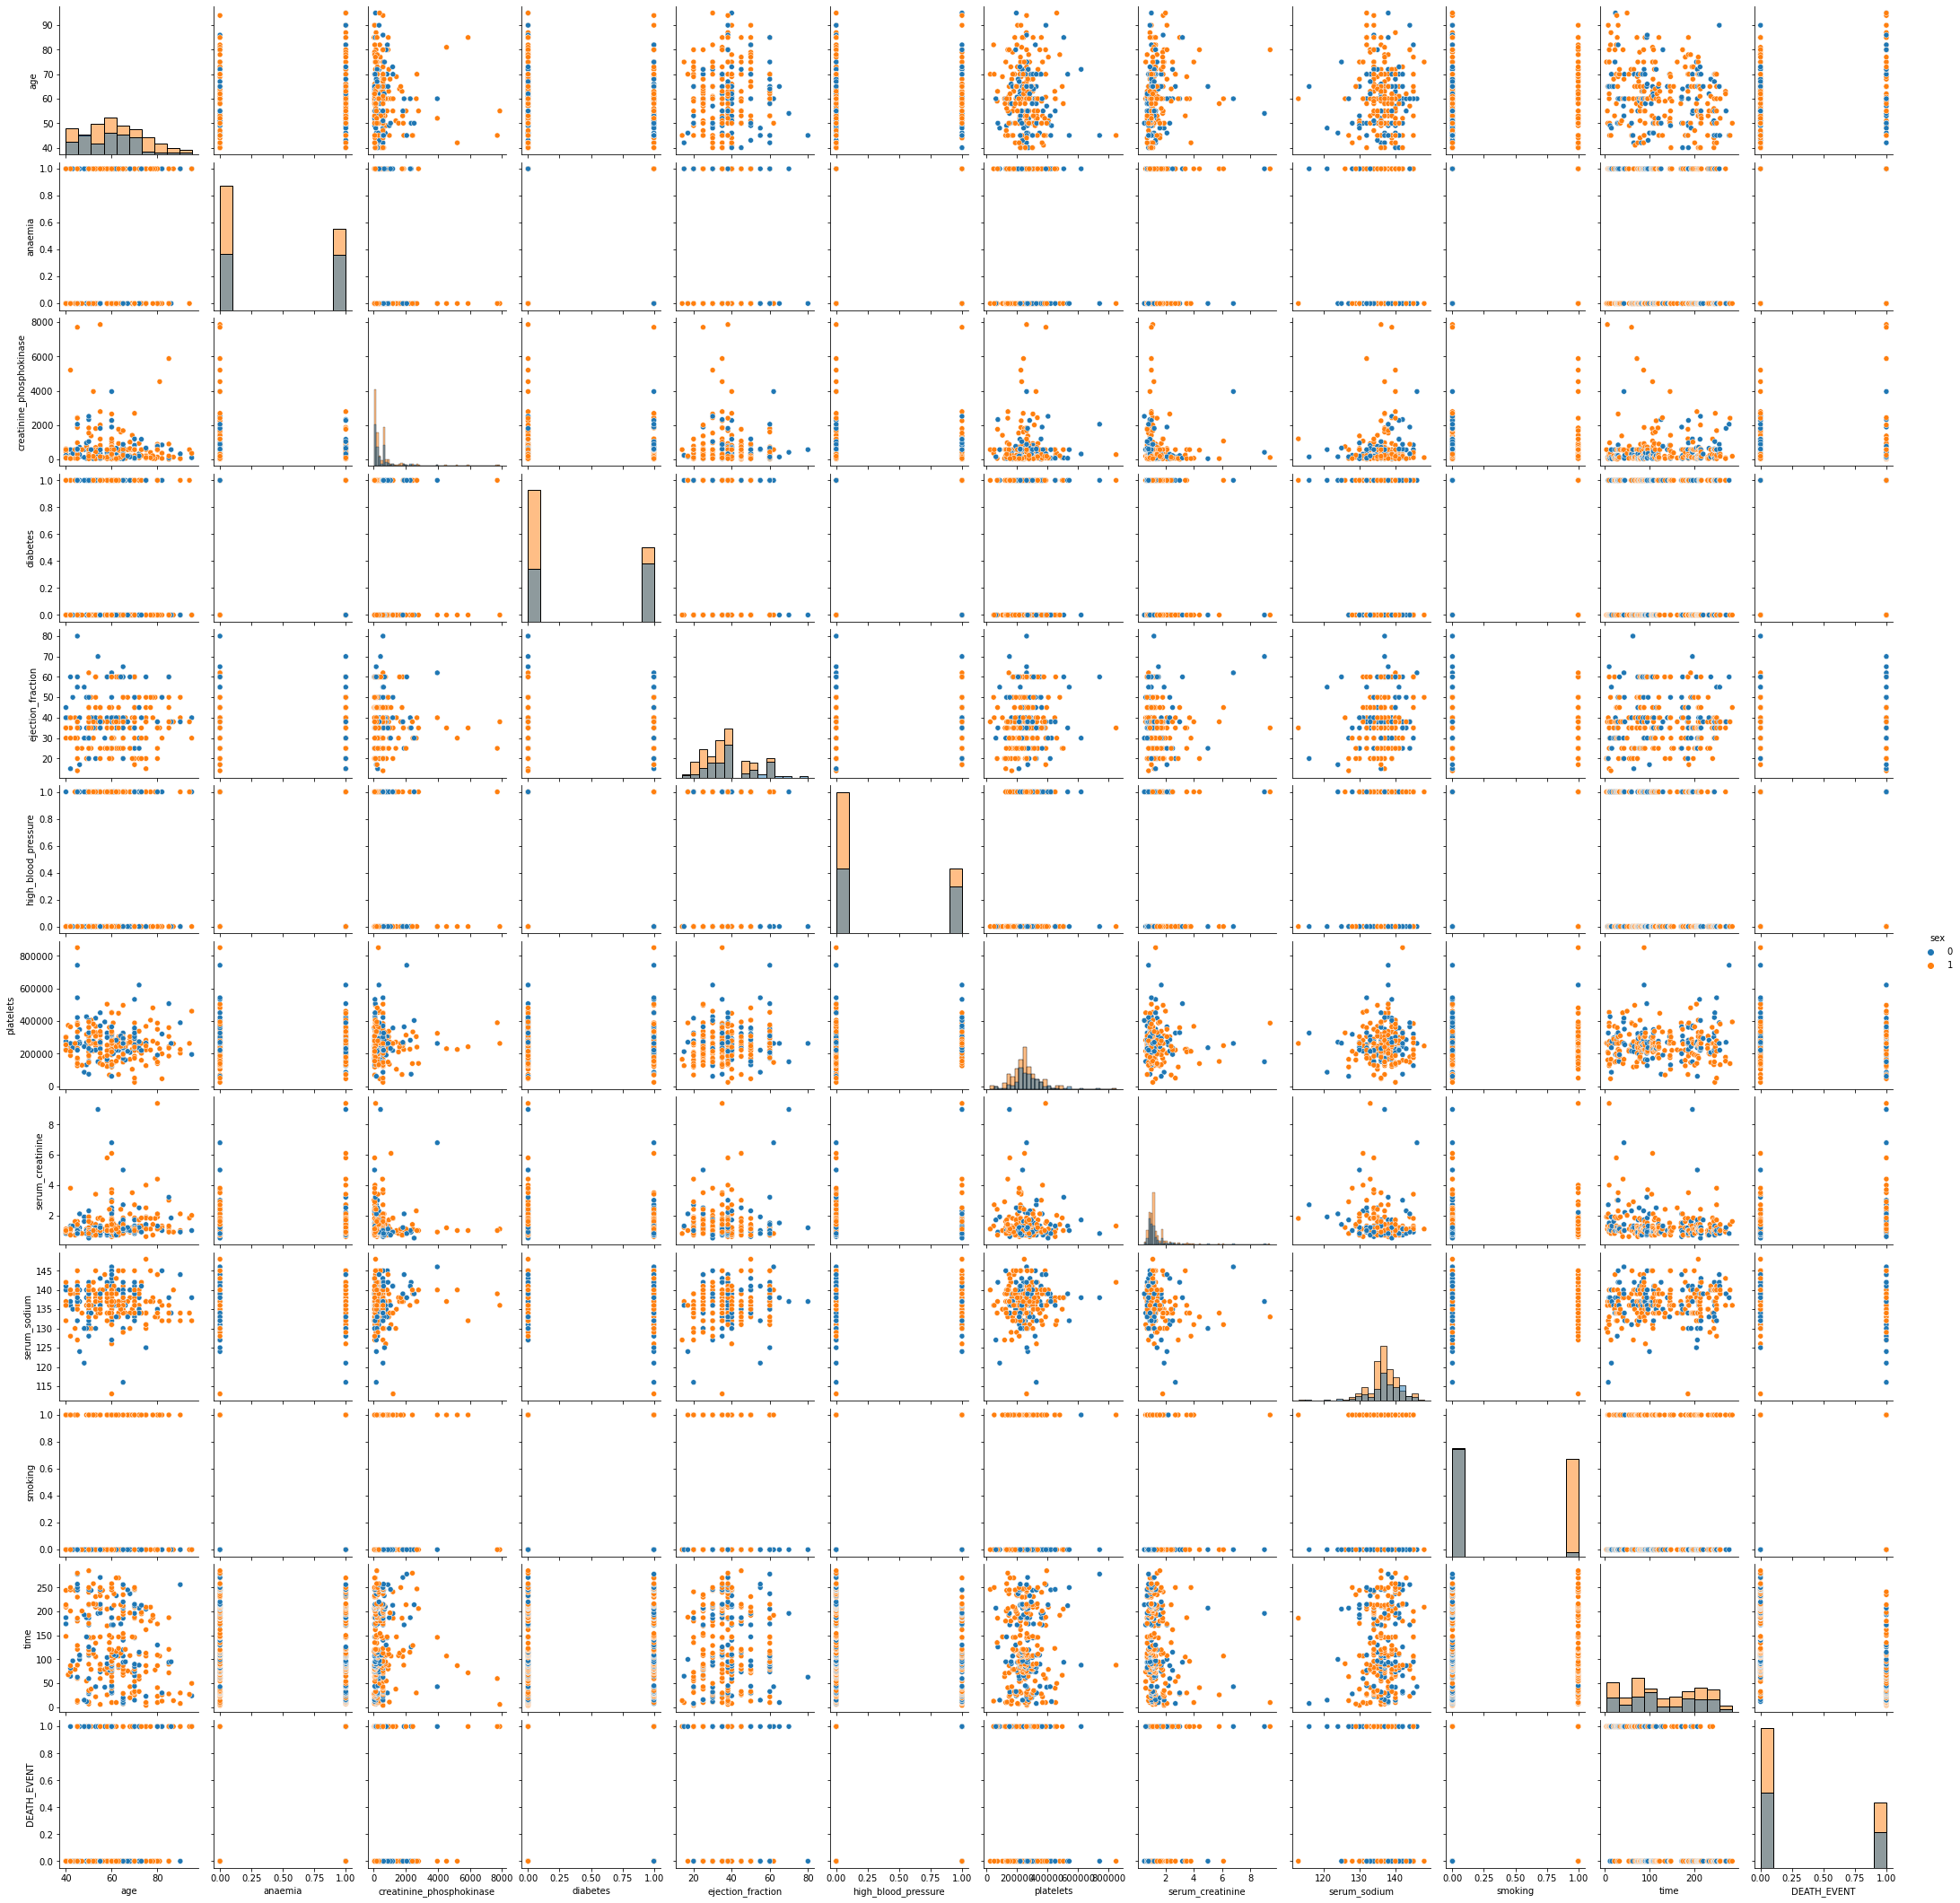

In [10]:
plt.figure(figsize=(30,25),dpi=120)
sns.pairplot(data=data,hue = 'sex',diag_kind="hist")
plt.show()

In [11]:
# This will open a new html page with EDA comparing every data with gender.
import sweetviz as sv
report = sv.analyze(data,target_feat="sex")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='time', ylabel='age'>

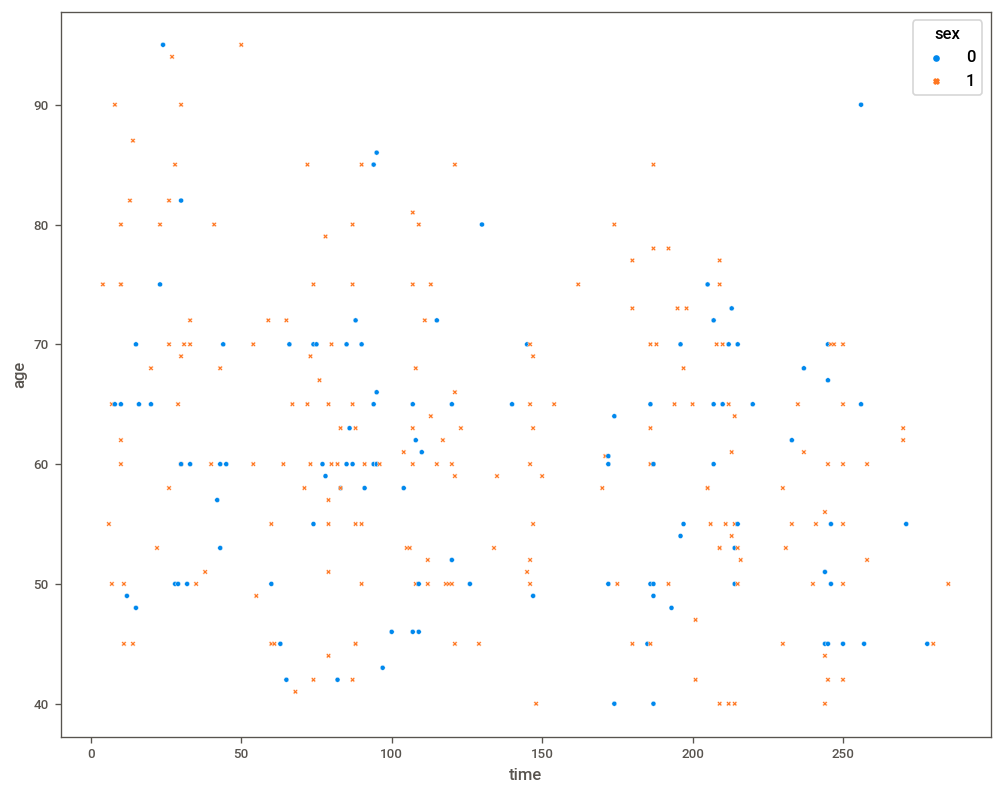

In [12]:
plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=data,x="time",y="age",hue="sex",style="sex")

<AxesSubplot:xlabel='diabetes', ylabel='age'>

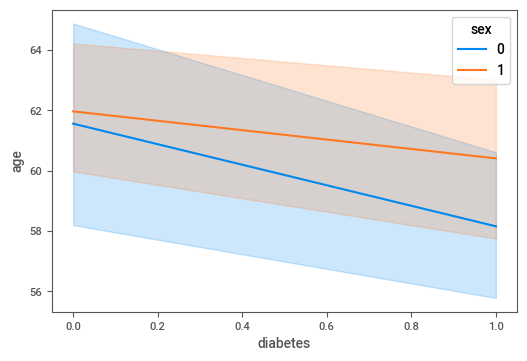

In [25]:
sns.lineplot(data=data,x="diabetes",y="age",hue='sex')

### In this above line graph, Male having diabetes are in age between 55 to 65; whereas, Female having diabetes are in age between 59 to 64.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

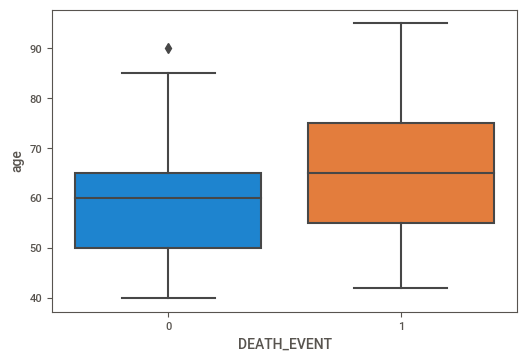

In [14]:
sns.boxplot(data=data,x="DEATH_EVENT",y="age")

### In above box graph, Death Event of male is early than female.

<AxesSubplot:xlabel='smoking', ylabel='count'>

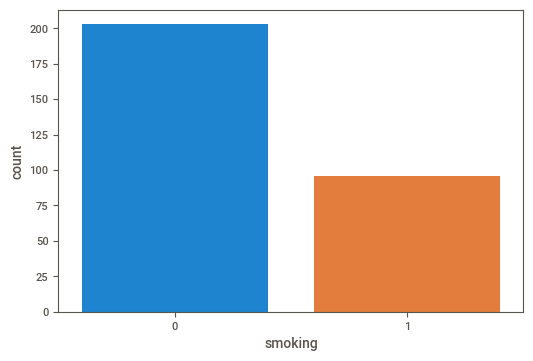

In [15]:
sns.countplot(data=data,x="smoking")

### In above bar graph, male use to smoke more than female.

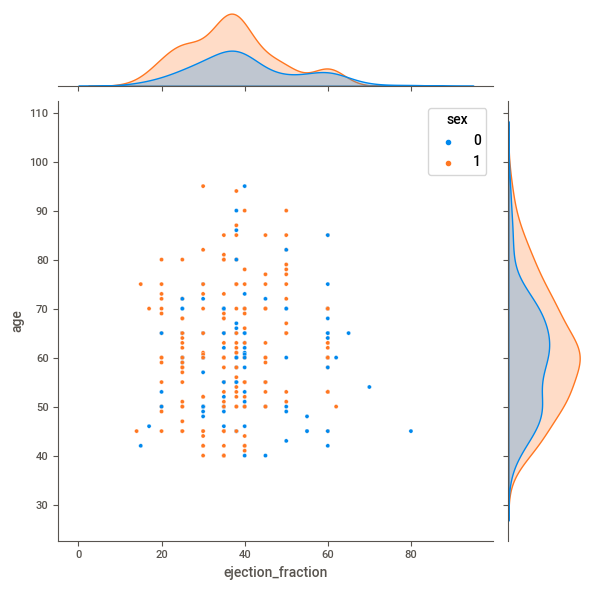

In [16]:
sns.jointplot(data=data,x="ejection_fraction",y="age",hue='sex',kind='scatter')

C:\Users\Rutvik\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='anaemia', ylabel='platelets'>

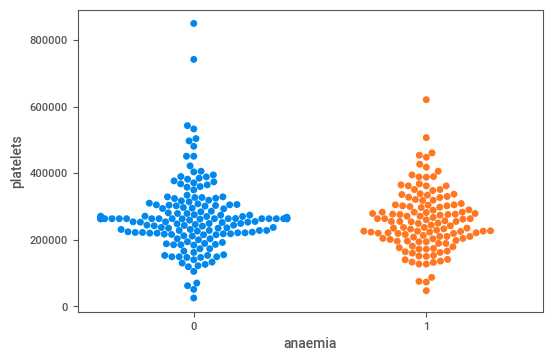

In [17]:
sns.swarmplot(data=data, x="anaemia", y="platelets")

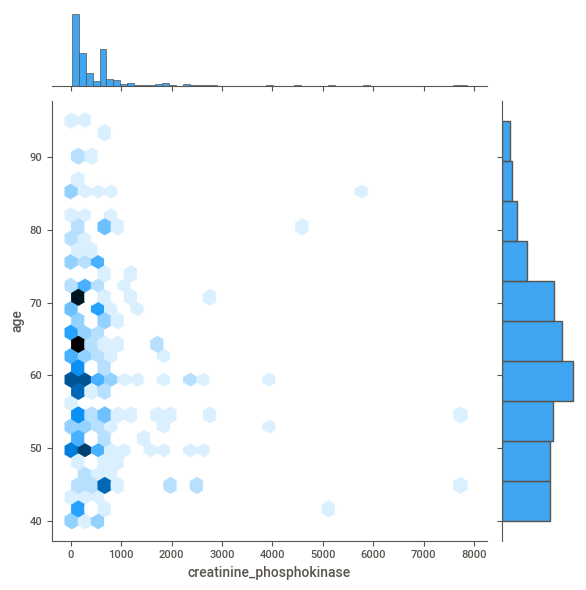

In [18]:
sns.jointplot(data=data,x="creatinine_phosphokinase",y="age",kind='hex')

## Performing SUPPORT VECTOR MACHINE (SVM) Classification

In [19]:
X = data.drop("DEATH_EVENT",axis=1)
y = data["DEATH_EVENT"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.model_selection import train_test_split

x = data.drop("DEATH_EVENT",axis=1)
y = data["DEATH_EVENT"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (239, 12)
x_test shape: (60, 12)
y_train shape: (239, 1)
y_test shape: (60, 1)


In [22]:
result_dict_train = {}
result_dict_test = {}

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
accuracies = cross_val_score(svc, x_train, y_train)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7029255319148937
Test Score: 0.5833333333333334


C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rutvik\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

# SVM Train Percentage is 70%.
# SVM Test Percentage is 58%.